## Example - Comparing Penguins 🐧 

Let's discover if there are significant differences in measures defining penguins (e.g. bill_length)

In [2]:
# import needed packages

import numpy as np
import pandas as pd
import scipy.stats as sps
# import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read penguins dataset, remove rows with nans

penguins = sns.load_dataset(name='penguins')
# penguins.dropna(inplace=True)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


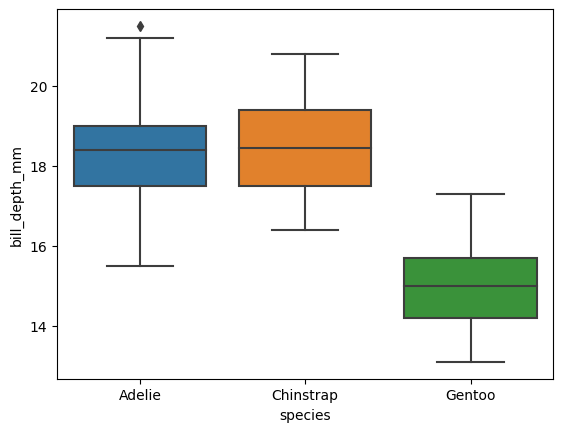

In [4]:
# Visually explore the data 
# Create a boxplot

sns.boxplot(data=penguins, x='species', y='bill_depth_mm');

Can you already make some conclusion from this visualization? Are some of the species more or less similar to each other?

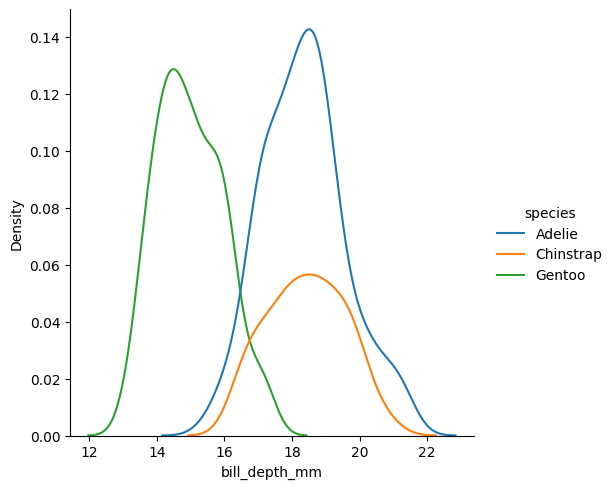

In [5]:
# Create a distplot

sns.displot(data=penguins, x='bill_depth_mm', hue='species', kind='kde');

## AB testing

Let's split our dataset into 3 smaller subsets representing different species. The tests that we will run can be only performed between 2 species at once:

In [6]:
# create 3 datasets - each of them representing one of the species 
chinstraps = penguins[penguins['species'] == 'Chinstrap']
adelies = penguins[penguins['species'] == 'Adelie']
gentoos = penguins[penguins['species'] == 'Gentoo']

In [7]:
# With the help of scipy.stats perform a t test checking if there is a significant difference between the penguins

sps.ttest_ind(adelies['bill_depth_mm'], chinstraps['bill_depth_mm'], nan_policy='omit', equal_var=False)

Ttest_indResult(statistic=-0.43770786441027243, pvalue=0.6622835883194864)

In [8]:
sps.ttest_ind(adelies['bill_depth_mm'], gentoos['bill_depth_mm'], nan_policy='omit', equal_var=False)

Ttest_indResult(statistic=25.337018388803852, pvalue=1.5059478700280908e-73)

In [10]:
sps.ttest_ind(chinstraps['bill_depth_mm'], gentoos['bill_depth_mm'], nan_policy='omit', equal_var=False)

Ttest_indResult(statistic=21.009605431711922, pvalue=2.132211849987114e-42)

Conclusions: 
- adelies and chinstraps have very similar bill depth 
- there is however a significant difference between gentoos and both chinstraps and adelies (p value is very tiny for both of these tests)


Question: what about other penguins features? The test above is only checking the bill length. It means that we can only draw this conclusion about this feature only and if we would like to check e.g. differences between flippers lengths we would need to perform another set of tests. Feel free to give a try!